# DAT200 CA5 2022

Author: Nora Mikarlsen 

Kaggle username: nomik12

### Imports

In [64]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline 
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score

### Reading data

In [65]:
raw_train = pd.read_csv('data/train.csv')
raw_test = pd.read_csv('data/test.csv')
# Rename column Unnamed: 0 to Index and set this as dataframe index. 
raw_train = raw_train.rename({"Unnamed: 0": "Index"}, axis=1)
raw_train = raw_train.set_index("Index")

raw_test = raw_test.rename({"Unnamed: 0": "Index"}, axis=1)
raw_test = raw_test.set_index("Index")
raw_train.head()


Capsaicin level  Pungent odor  Vitamin C  Water  Light transmittance  \
Index                                                                         
0                166.7           6.8        0.0  77.95                 32.4   
1                170.4           5.7        0.0  74.06                 39.0   
2                212.5           3.1        0.0  88.27                 22.4   
3                216.0           1.0        0.0  80.01                 22.4   
4                146.5           1.3      141.0  78.64                 28.8   

       Temp storage  Time storage  Dihydrocapsaicin level  Fibre density  \
Index                                                                      
0               7.5           4.0                    32.4          13.56   
1               4.7          52.0                    47.1           8.58   
2               5.9           1.0                   161.7          13.57   
3               6.4          31.0                    10.2          21.27   
4               4.6          38.0                    20.7           5.83   

       Protein density  Saturated fatty acids  Monounsaturated fatty acids  \
Index                                                                        
0                 1.05                  24.47                         0.67   
1                 0.93                  22.42                         1.10   
2                 1.02                  22.15                         4.08   
3                 0.98                  19.82                         0.57   
4                 0.96                  23.95                         0.54   

       Polyunsaturated fatty acids  Scoville score  
Index                                               
0                             0.41       4051080.0  
1                             0.22       4258252.0  
2                             0.50       2678566.0  
3                             0.04        801070.0  
4                             0.32       2680508.0

### Data exploration and visualisation

#### Pairplot

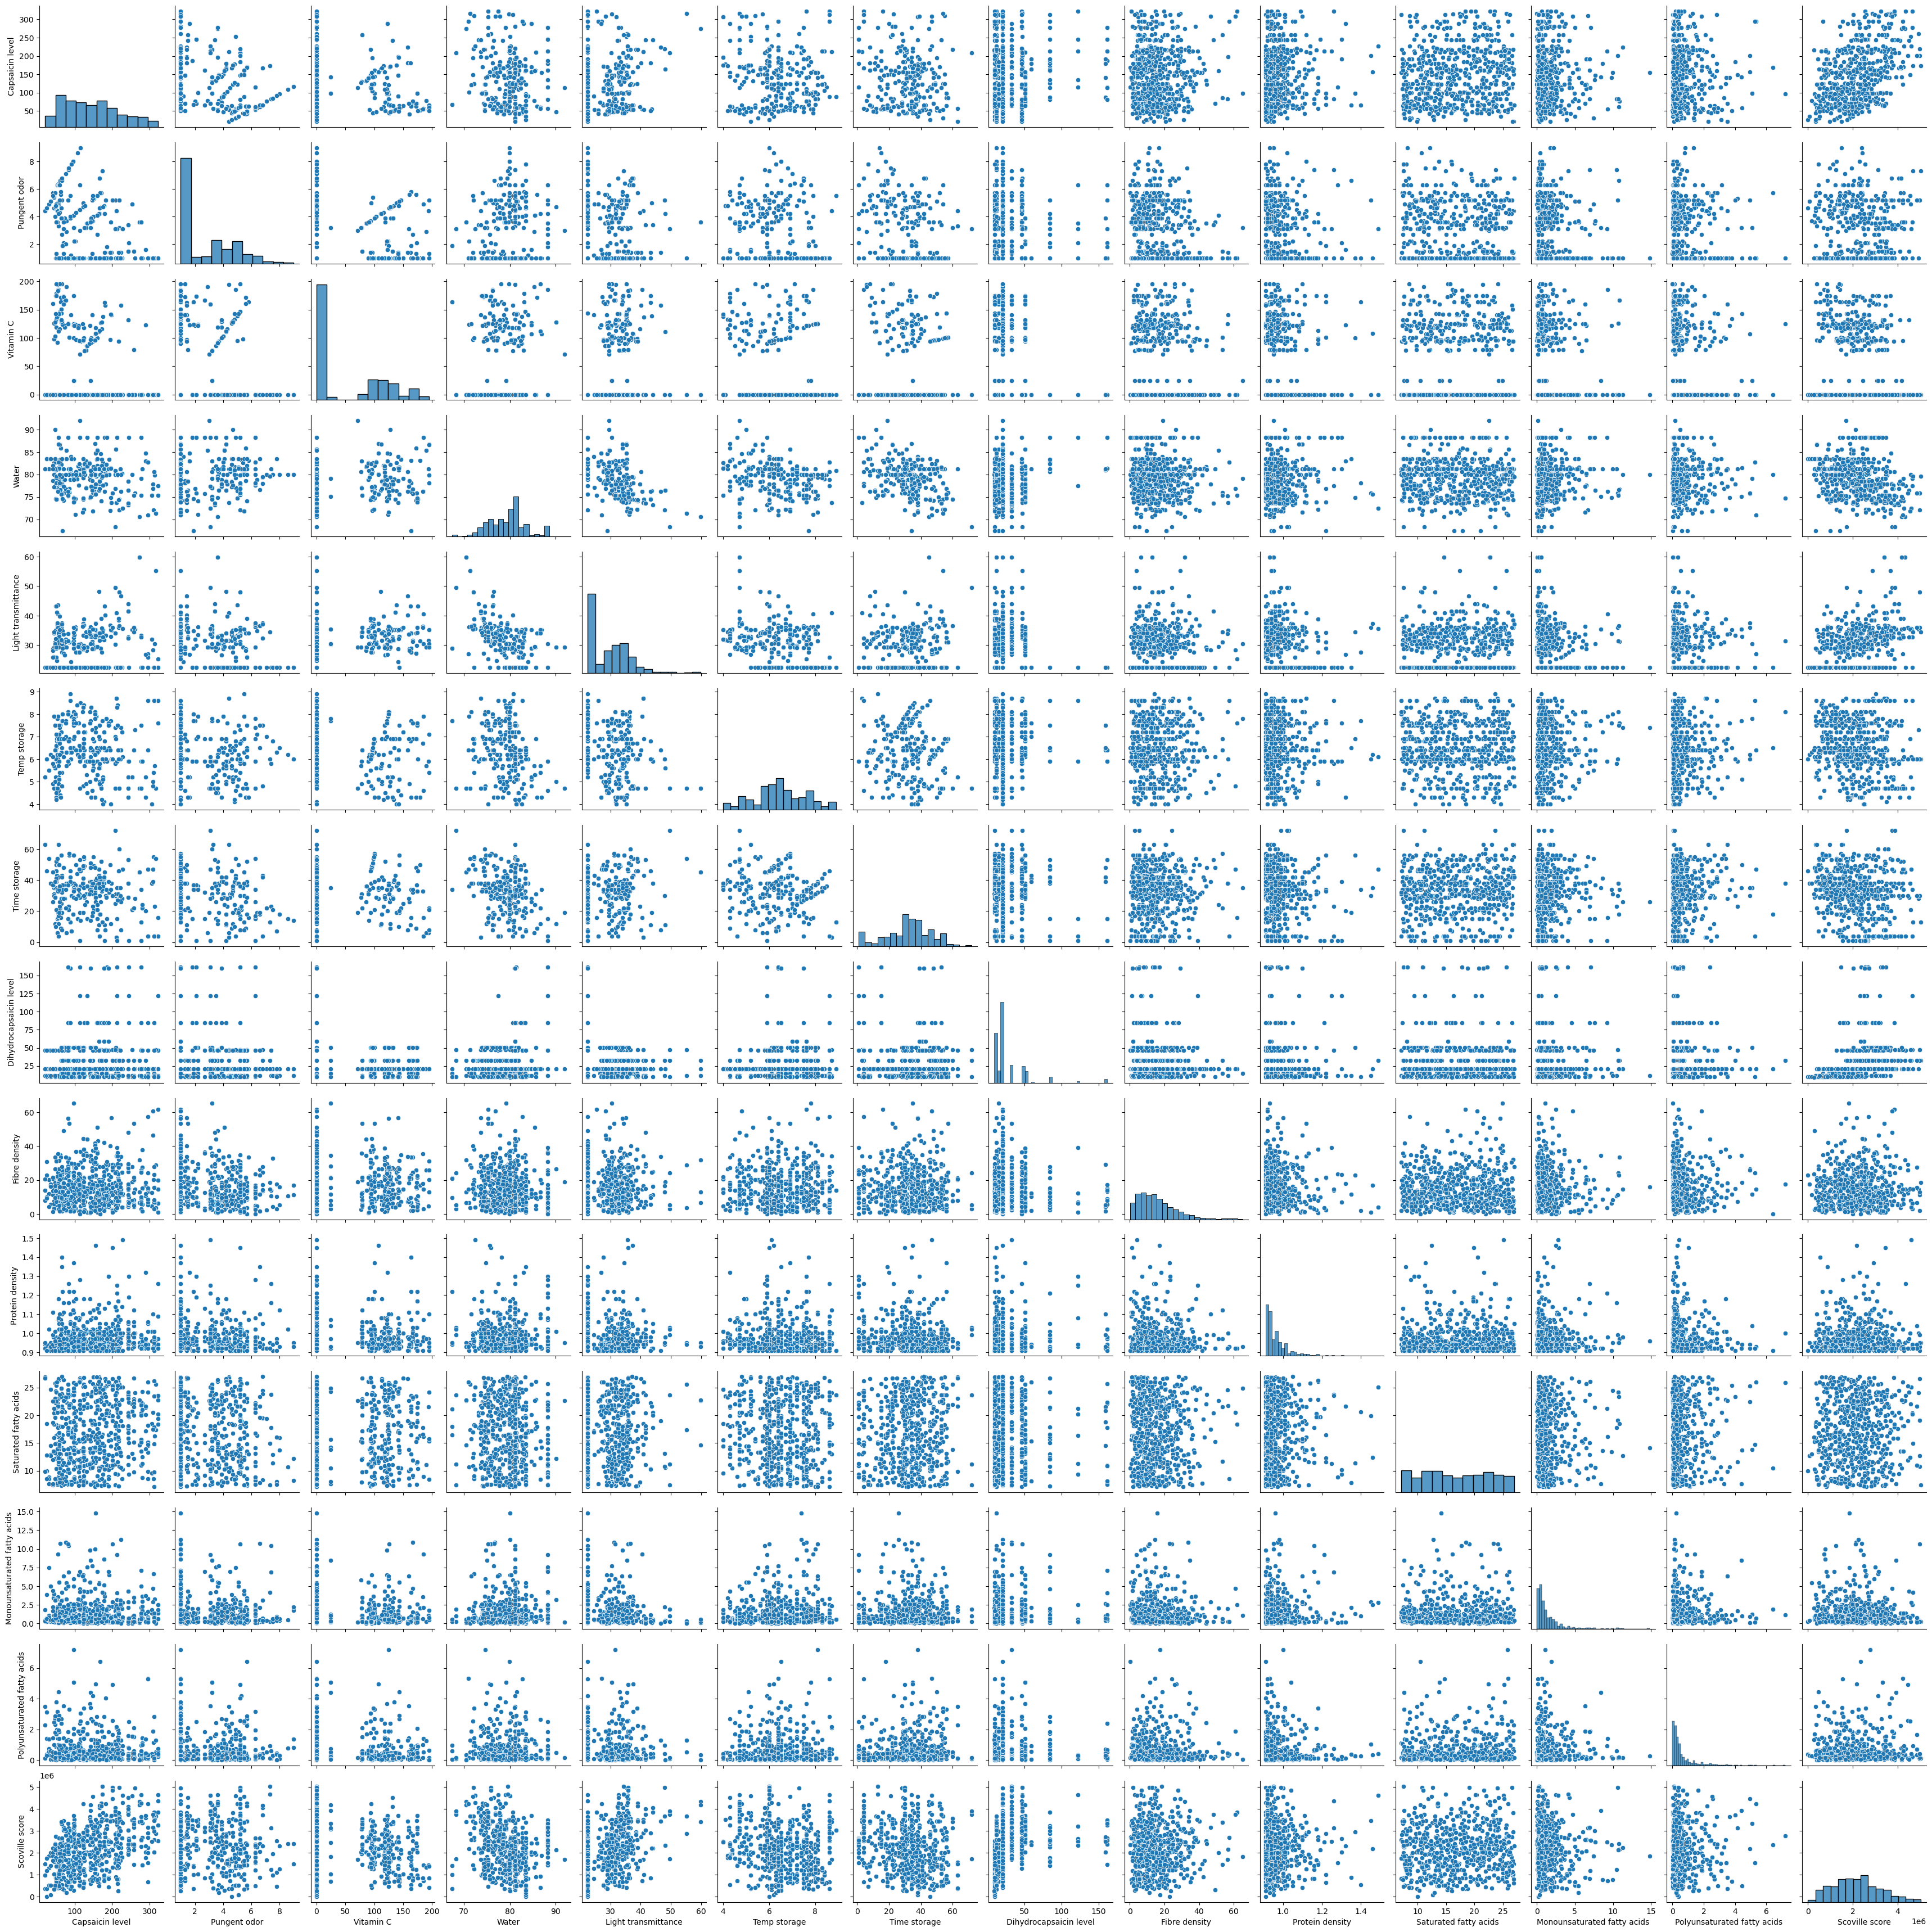

In [66]:
sns.pairplot(raw_train)
plt.show()

#### Heatmap

<AxesSubplot: >

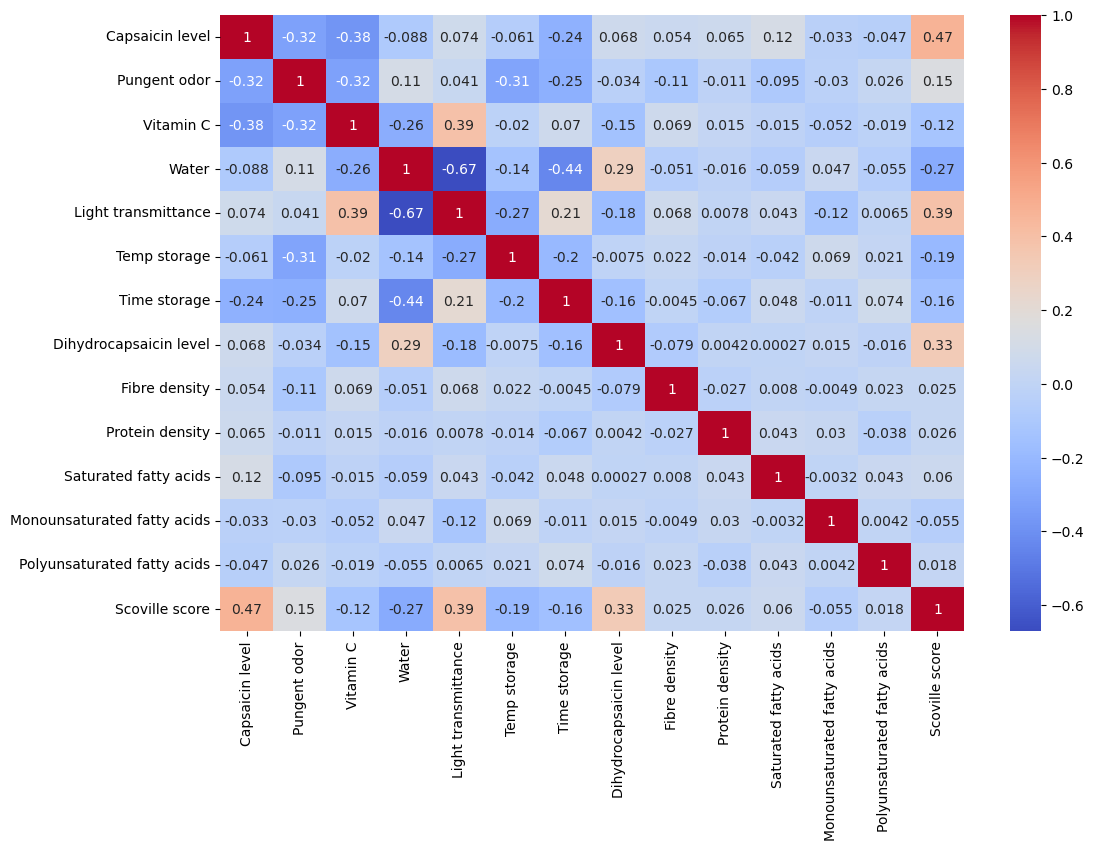

In [67]:
plt.figure(figsize=(12, 8))
sns.heatmap(raw_train.corr(), annot=True, cmap='coolwarm')

From the pairplot and heatmap, it doesn't look like any of the columns are very strongly correlated. But there does seem to be a significant negative correlation between light transmittance and water. Also seem to be a significant positive correlation between Scoville score and capasaicin level. 

#### Violinplot 

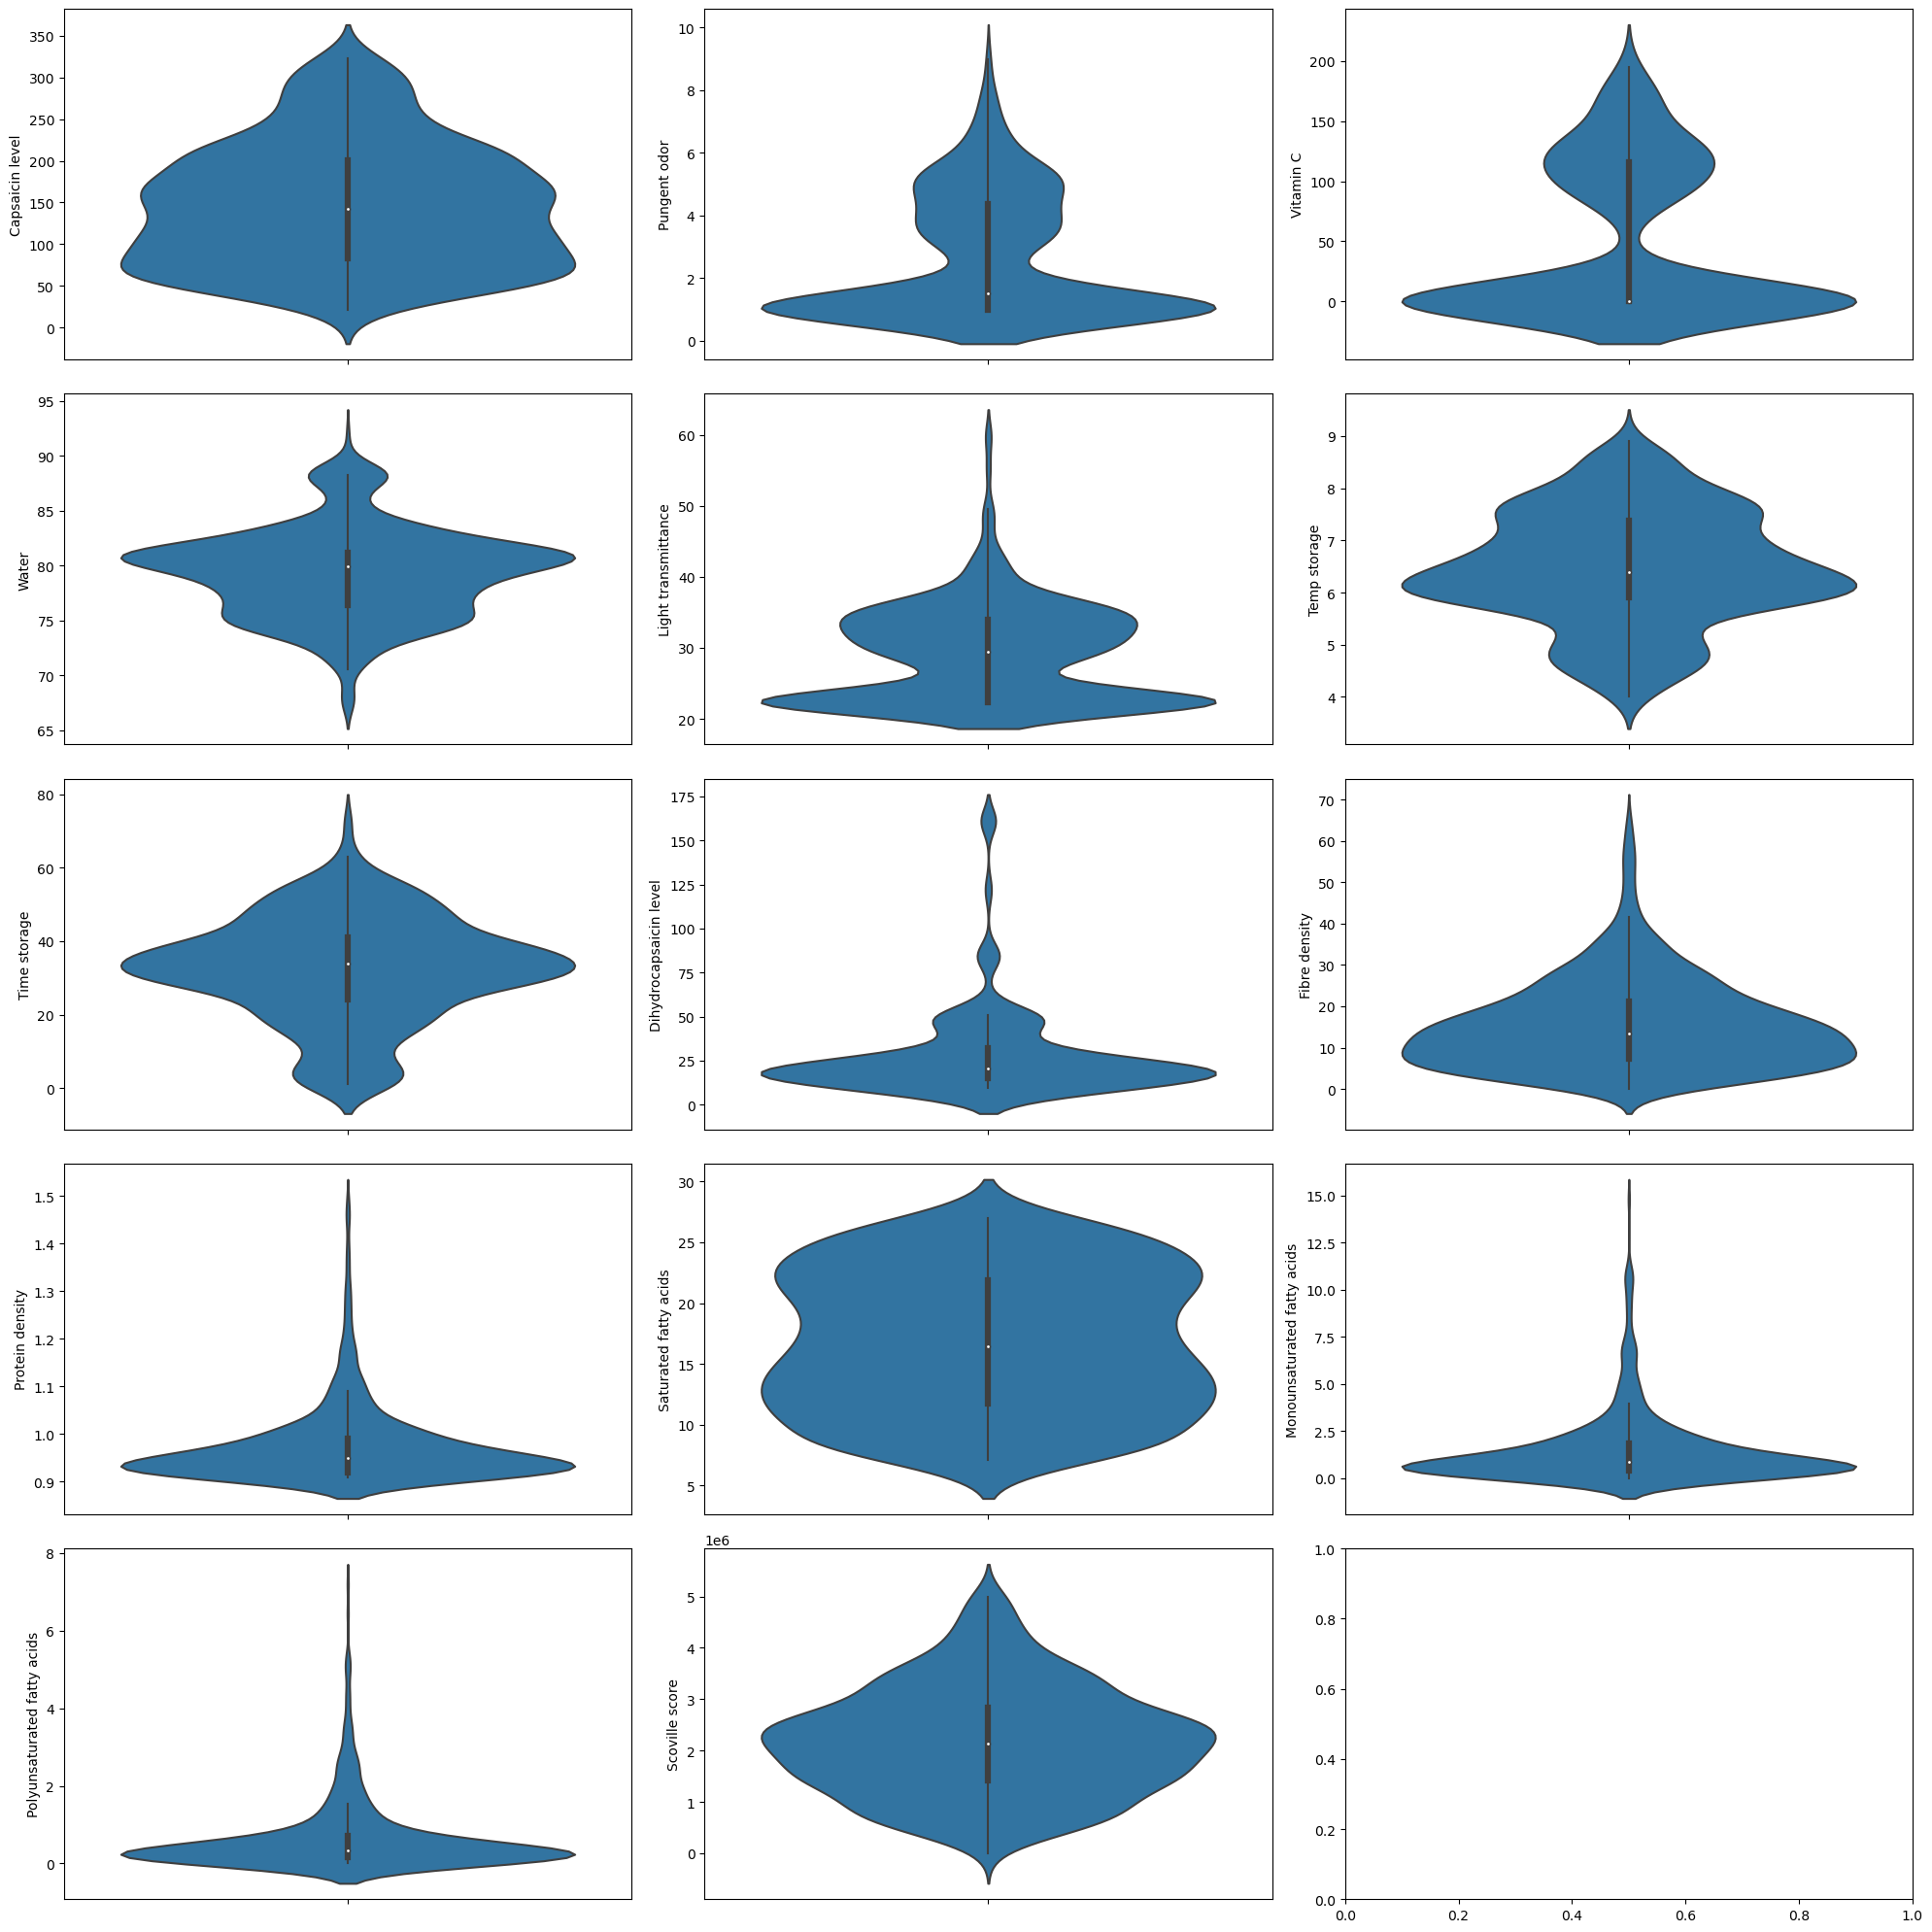

In [68]:
# Violinplots 
fig, axes = plt.subplots(5,3, figsize=(20,20))
ax = axes.ravel()
for i, col in enumerate(raw_train.columns[:19]):
    g = sns.violinplot(data=raw_train, y=col, ax=ax[i])
    plt.tight_layout()
plt.show()

The data doesn't seem to be normally distributed. Some of the columns such as protein density, Polyunsaturated fatty acids, Monounsaturated fatty acids, and Dihydrocapsaicin level have long tails, indicating that there may be some outliers in those columns. While other columns show a distribution with two or more peaks, like for example light transmittance. 

#### Boxplot 

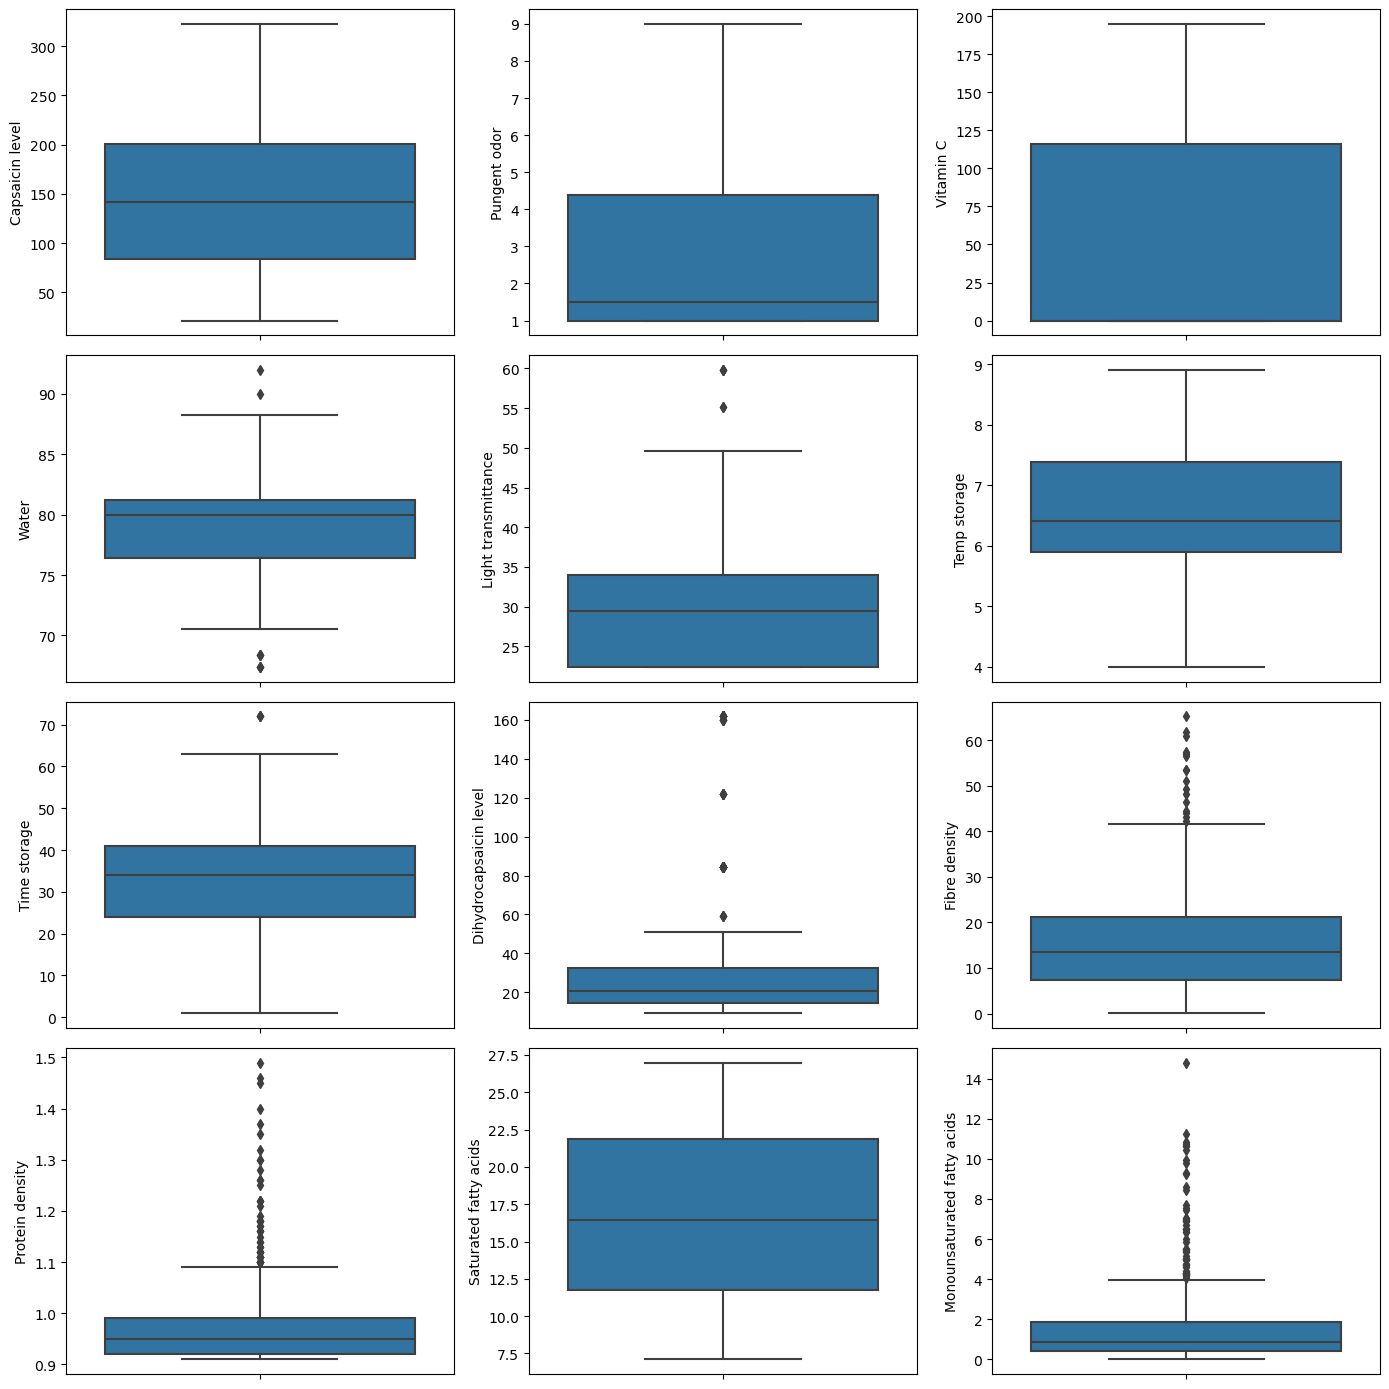

In [69]:
# Boxplots 
fig, axes = plt.subplots(4, 3, figsize=(14,14))
ax = axes.ravel()
# Plot boxplot only for columns with numeric values
for i, col in enumerate(raw_train.select_dtypes(include=np.number).columns[:12]):
    sns.boxplot(data=raw_train, y=col, ax=ax[i])
    plt.tight_layout()
plt.show()

The columns protein density and monounsaturated fatty acids both seem to display a high amount of outliers. Fiber density also show significant amount of outliers. Dihydrocapsaicin level also show some outliers. Some of the other columns have outliers as well, but only a couple of them. 

### Data cleaning

#### Handle missing data 

In [70]:
# Check whether any data is missing
raw_train.isnull().sum()

Capsaicin level                0
Pungent odor                   0
Vitamin C                      0
Water                          0
Light transmittance            0
Temp storage                   0
Time storage                   0
Dihydrocapsaicin level         0
Fibre density                  0
Protein density                0
Saturated fatty acids          0
Monounsaturated fatty acids    0
Polyunsaturated fatty acids    0
Scoville score                 0
dtype: int64

In [71]:
raw_test.isnull().sum()

Capsaicin level                0
Pungent odor                   0
Vitamin C                      0
Water                          0
Light transmittance            0
Temp storage                   0
Time storage                   0
Dihydrocapsaicin level         0
Fibre density                  0
Protein density                0
Saturated fatty acids          0
Monounsaturated fatty acids    0
Polyunsaturated fatty acids    0
dtype: int64

There are no NaN values in either train or test data, so no need to do anything about that. 

#### Remove outliers 

In [72]:
# Use Z-score for removing outliers 
# code from https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
z = np.abs(stats.zscore(raw_train))
clean_train = raw_train[(z < 3).all(axis=1)]
print(f'New dataframe shape: {clean_train.shape}')
print(f'{raw_train.shape[0]-clean_train.shape[0]} rows have been removed')

New dataframe shape: (538, 14)
80 rows have been removed


### Data exploration after cleaning

#### Boxplot 

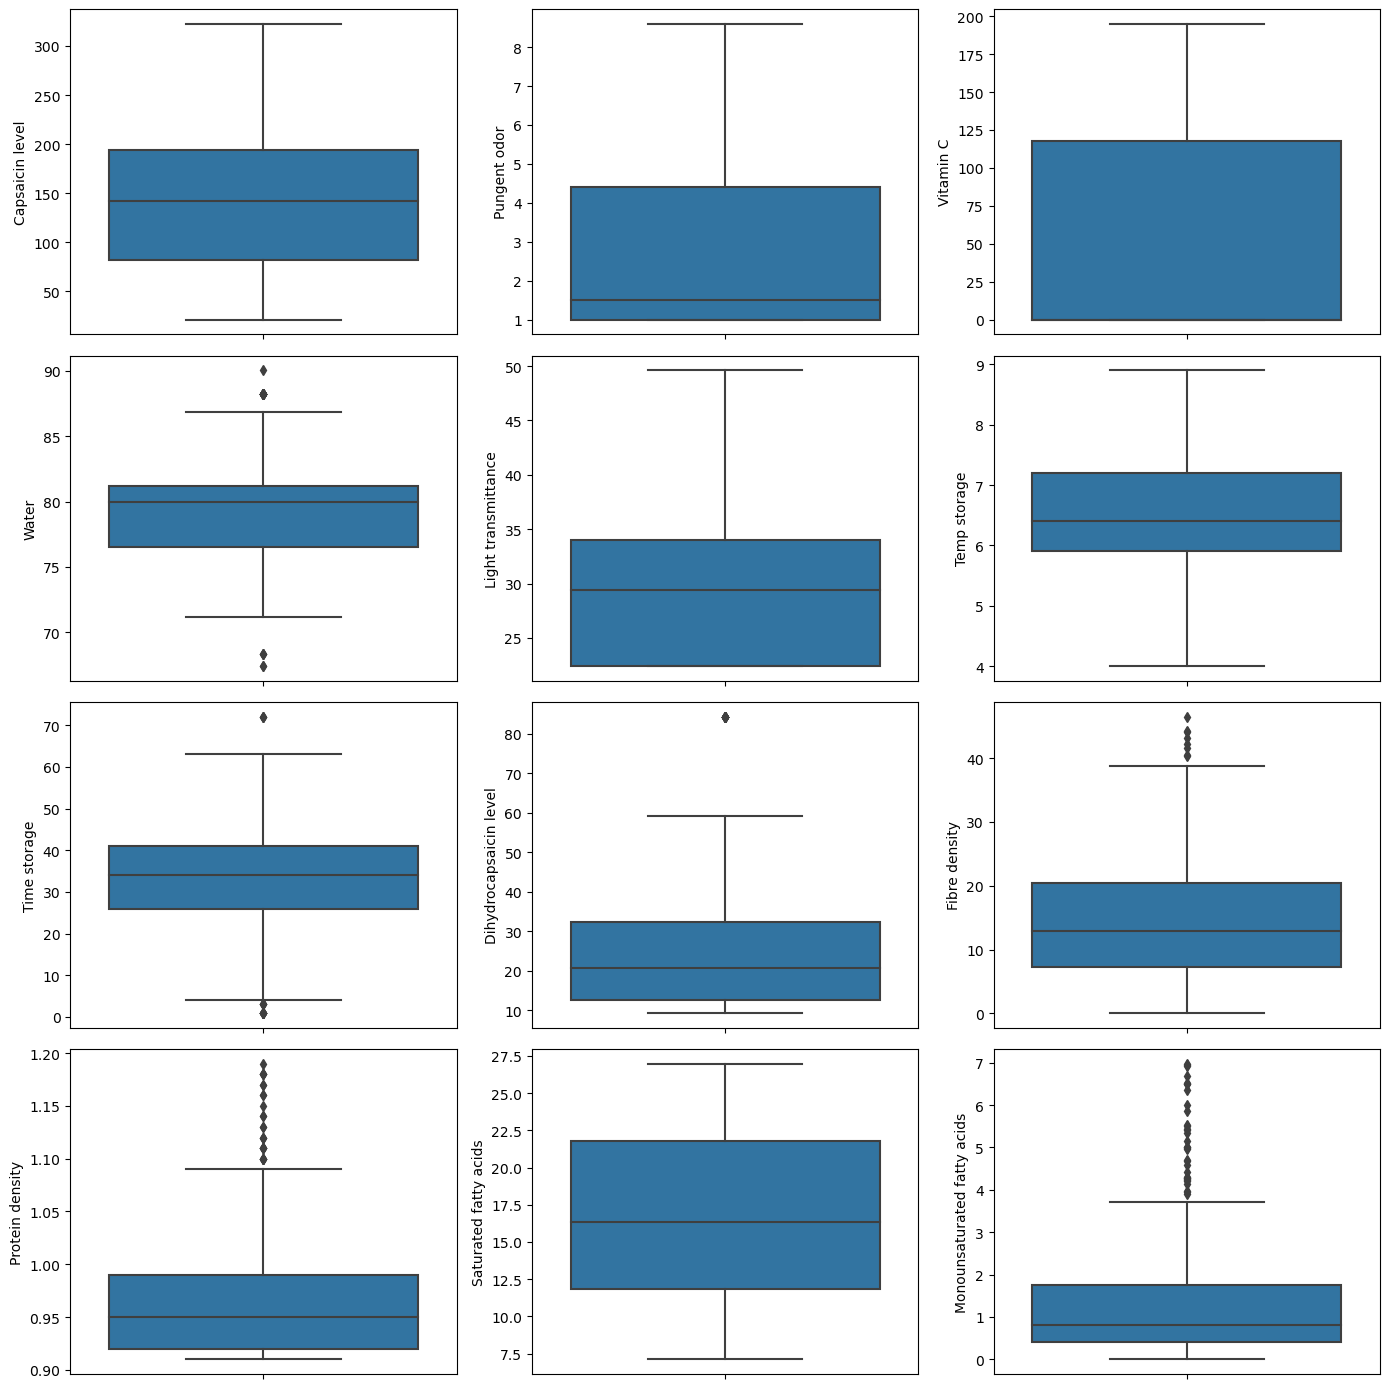

In [73]:
# Boxplots 
fig, axes = plt.subplots(4, 3, figsize=(14,14))
ax = axes.ravel()
# Plot boxplot only for columns with numeric values
for i, col in enumerate(clean_train.select_dtypes(include=np.number).columns[:12]):
    sns.boxplot(data=clean_train, y=col, ax=ax[i])
    plt.tight_layout()
plt.show()

#### Violinplot 

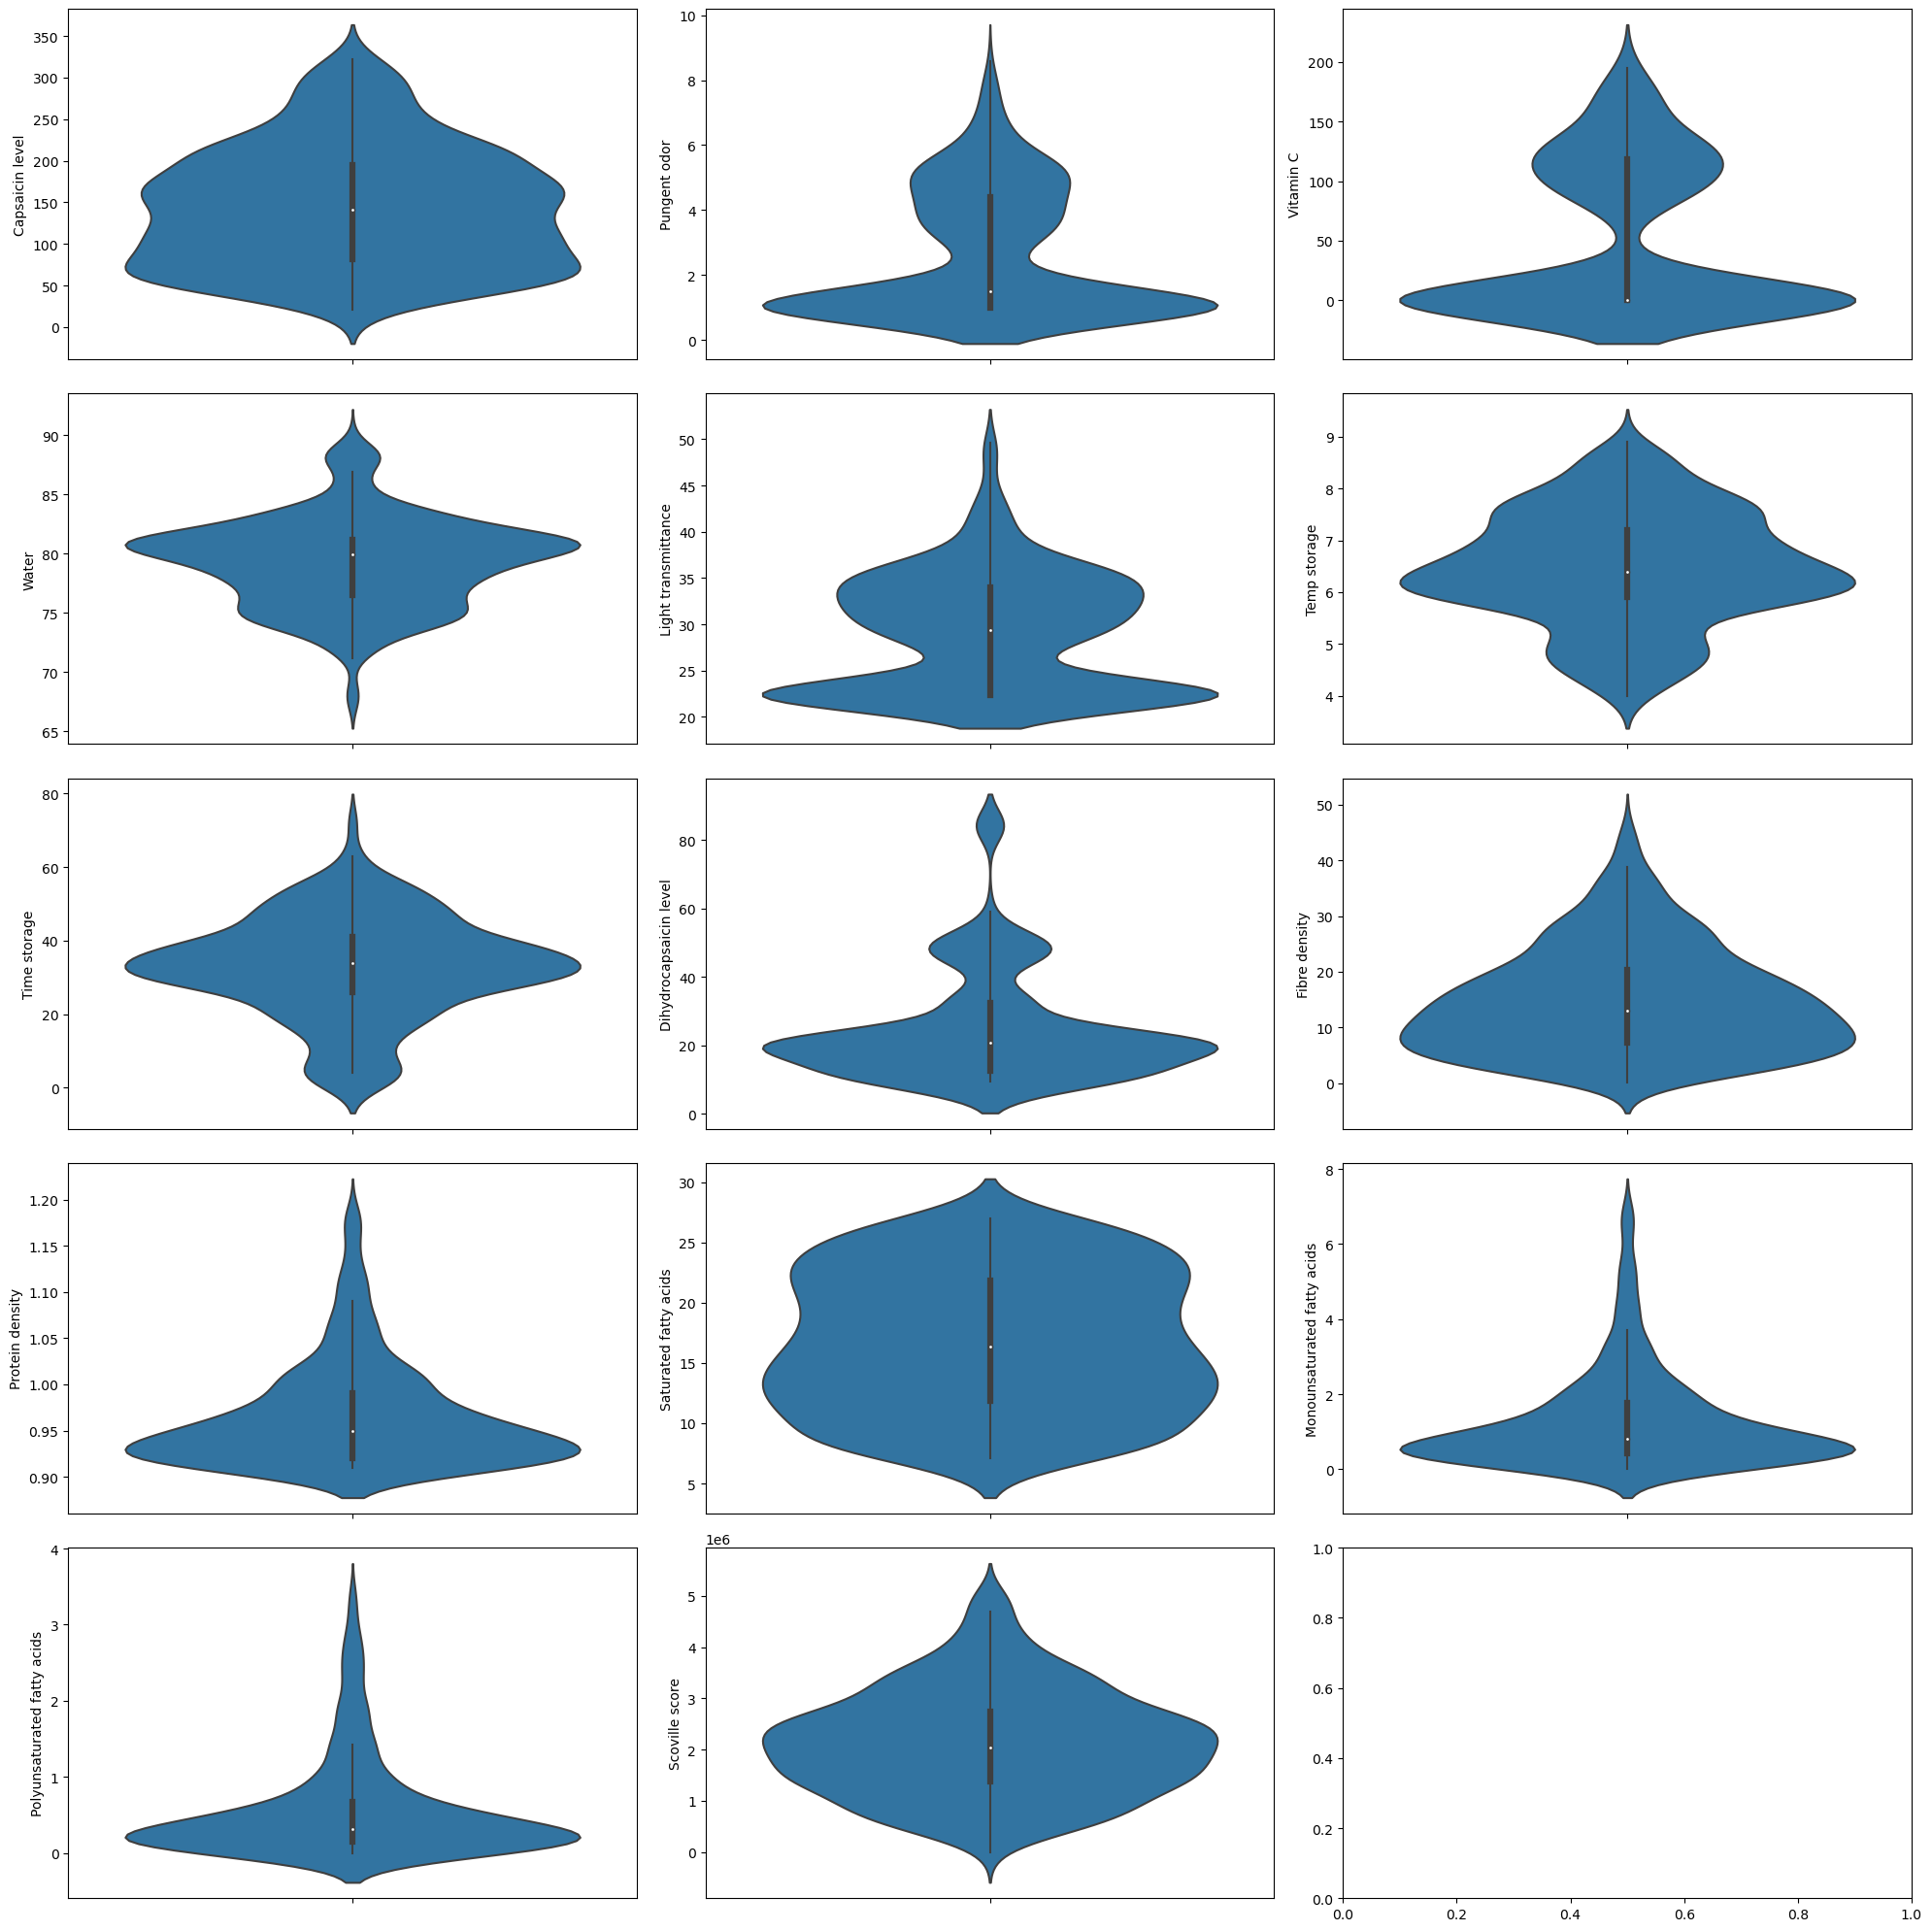

In [74]:
# Violinplots 
fig, axes = plt.subplots(5,3, figsize=(20,20))
ax = axes.ravel()
for i, col in enumerate(clean_train.columns[:19]):
    g = sns.violinplot(data=clean_train, y=col, ax=ax[i])
    plt.tight_layout()
plt.show()

From the violinplot we see that some of the long tails have been shortened. From the boxplot it at first looks very similar to the boxplot before cleaning, but if you look at the y-axis, you'll see that the values have changed for the upper range. 

### Data preprocessing

#### Train test split

In [75]:
X = clean_train.loc[:, clean_train.columns != 'Scoville score']
y = clean_train['Scoville score']
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=1)


#### Scaling

In [76]:
sc = StandardScaler()
sc.fit(X_train)
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

### Modelling

#### Data pipeline with regression model

I tried several different regression models including linear regression and RANSAC, but found that of the models I tried Random forest regression gave the best performance. 

##### __Random Forest Regressor with feature selection and outliers included__

__Include outliers for better prediction__

I tested the performance both with outliers and without outliers and found that with the random forest regressor including the full dataset with outliers gave the best performance. The test with outliers removed is not included here.  

In [77]:
X = raw_train.loc[:, raw_train.columns != 'Scoville score']
y = raw_train['Scoville score']
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=1)

__Feature selection__

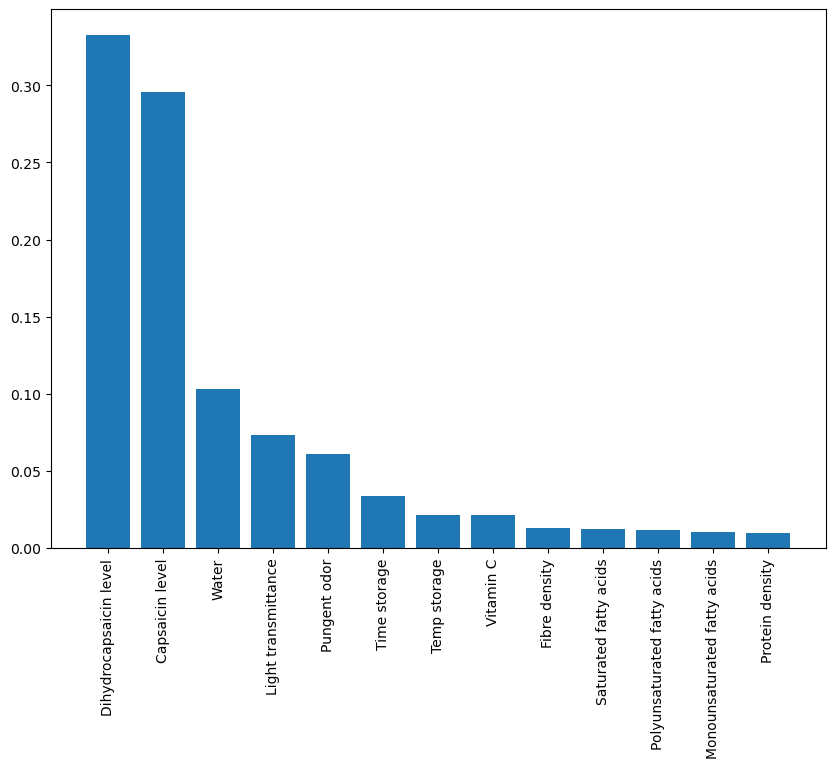

In [78]:
# Find most important features 
forest = RandomForestRegressor(n_estimators=1000, 
                               criterion='squared_error', 
                               random_state=1, 
                               n_jobs=-1)
forest.fit(X, y)
feat = forest.feature_importances_
names = X.columns
sorted_cols = []
sorted_feat = []
indices = np.argsort(feat)[::-1]
for f in range(X_train.shape[1]):
    sorted_cols.append(names[indices[f]])
    sorted_feat.append(feat[indices[f]])
plt.figure(figsize=(10, 7))
plt.bar(sorted_cols, sorted_feat)
plt.xticks(rotation=90)
plt.show()

In [79]:
# See how many features to include for best performance 
for i in range(1, len(sorted_cols)+1):

    forest = RandomForestRegressor(n_estimators=1000, 
                                   criterion='squared_error',
                                   random_state=1,
                                   n_jobs=-1)
    y_train_mae = []
    y_test_mae = []
    y_train_r2 = []
    y_test_r2 = []
    for rs in range(10):
        X = clean_train.loc[:, clean_train.columns != 'Scoville score']
        y = clean_train['Scoville score']
        X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=0.3, random_state=rs)
        
        forest.fit(X_train[sorted_cols[:i]], y_train)
        y_train_pred = forest.predict(X_train[sorted_cols[:i]])
        y_test_pred = forest.predict(X_test[sorted_cols[:i]])
        y_train_mae.append(MAE(y_train, y_train_pred))
        y_test_mae.append(MAE(y_test, y_test_pred))
        y_train_r2.append(r2_score(y_train, y_train_pred))
        y_test_r2.append(r2_score(y_test, y_test_pred))

    print(f'MAE test for {i} columns: {np.mean(y_test_mae)}, R^2 for {i} columns: {np.mean(y_test_r2)}')


MAE test for 1 columns: 628525.0780119209, R^2 for 1 columns: 0.40926966208395205
MAE test for 2 columns: 486167.03350848873, R^2 for 2 columns: 0.621163991952416
MAE test for 3 columns: 360764.4420293084, R^2 for 3 columns: 0.7749841834886988
MAE test for 4 columns: 343454.04412625916, R^2 for 4 columns: 0.8028872921517882
MAE test for 5 columns: 288236.82194167445, R^2 for 5 columns: 0.8626253561494177
MAE test for 6 columns: 280791.75336731516, R^2 for 6 columns: 0.8661305793749831
MAE test for 7 columns: 281516.58893920685, R^2 for 7 columns: 0.8656723215222876
MAE test for 8 columns: 282061.4991650617, R^2 for 8 columns: 0.8649971183399296
MAE test for 9 columns: 299831.28192901233, R^2 for 9 columns: 0.8538007722364311
MAE test for 10 columns: 309795.14465308643, R^2 for 10 columns: 0.8458680020858497
MAE test for 11 columns: 317314.05439320987, R^2 for 11 columns: 0.8402370670009066
MAE test for 12 columns: 323327.37776728394, R^2 for 12 columns: 0.8361874117369702
MAE test for 

Get the best performance for the 6 most important columns in the dataset, after that the performance decreases. 

__Find best hyperparameters__

In [80]:
pipe_rfr = make_pipeline(RandomForestRegressor( 
                               random_state=1,
                               n_jobs=-1))

param_range = [i for i in range(500, 1500, 100)]

param_grid   = [{'randomforestregressor__criterion': ['absolute_error', 'squared_error'],
                'randomforestregressor__n_estimators': param_range}]

gs = GridSearchCV(estimator=pipe_rfr, 
                  param_grid=param_grid, 
                  scoring='neg_mean_absolute_error', 
                  cv=10,
                  n_jobs=-1)

gs = gs.fit(X_train[sorted_cols[:6]], y_train)
print(gs.best_score_)
print(gs.best_params_)

-304937.81909069116
{'randomforestregressor__criterion': 'squared_error', 'randomforestregressor__n_estimators': 1300}


__Test the reduced model__

In [81]:
#Random forest with the 6 most important features. 
X_train_red = X_train[sorted_cols[:6]]
X_test_red = X_test[sorted_cols[:6]]

forest = RandomForestRegressor(n_estimators=1300, 
                               criterion='squared_error',
                               random_state=1,
                               n_jobs=-1)
forest.fit(X_train_red, y_train)
y_train_pred = forest.predict(X_train_red)
y_test_pred = forest.predict(X_test_red)

print('MAE train: %.3f, test: %.3f' % (
        MAE(y_train, y_train_pred),
        MAE(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MAE train: 108824.978, test: 294915.970
R^2 train: 0.981, test: 0.830


__Kaggle submission__

In [82]:
X_red = X[sorted_cols[:6]]
test_red = raw_test[sorted_cols[:6]]
forest.fit(X_red, y)
y_pred_rfr =forest.predict(test_red)

sub_df = pd.DataFrame({'Id' : [i for i in range(len(y_pred_rfr))], 'Scoville score': [int(y) for y in y_pred_rfr]})
sub_df.to_csv('submissions/submission_rfr5.csv', index=False)

MAE score on public leaderboard on Kaggle: 294000.32388 

#### Data pipeline with classification model

##### Binning train target values

Can be performed with ex. pandas.qcut or pandas.cut

```python
n_bins = 10
y_train_binned = pd.cut(y_train, n_bins, labels=False) # or
y_train_binned = pd.qcut(y_train, n_bins, labels=False) 
```

__Including outliers__

In [83]:
# Include outliers
X = raw_train.loc[:, raw_train.columns != 'Scoville score']
y = raw_train['Scoville score']
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=1)

__Binning__

In [84]:
n_bins = 10
y_train_binned = pd.cut(y_train, n_bins, labels=False)
y_test_binned = pd.cut(y_test, n_bins, labels=False)

__Grid Search__

In [85]:
forest = RandomForestClassifier(random_state=1, 
                                n_jobs=-1)

param_range = [i for i in range(500, 1500, 100)]

param_grid   = [{'n_estimators': param_range}]

gs = GridSearchCV(estimator=forest, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=10,
                  n_jobs=-1)

gs = gs.fit(X_train, y_train_binned)
print(gs.best_score_)
print(gs.best_params_)

0.40502114164904857
{'n_estimators': 1400}


__Testing classifier__

In [86]:
clf = gs.best_estimator_
clf.fit(X_train, y_train_binned)
y_train_pred_clf = clf.predict(X_train)
y_test_pred_clf = clf.predict(X_test)
print('Accuracy train: %.3f, test: %.3f' % (
        accuracy_score(y_train_binned, y_train_pred_clf),
        accuracy_score(y_test_binned, y_test_pred_clf)))


Accuracy train: 1.000, test: 0.409


__Comment on how increasing the number of bins affects the performance of the model__

In [87]:
y_train_acc = []
y_test_acc = []
for i in range(1, 10):
    n_bins = i
    y_train_binned = pd.cut(y_train, n_bins, labels=False)
    y_test_binned = pd.cut(y_test, n_bins, labels=False)
    
    clf = gs.best_estimator_
    clf.fit(X_train, y_train_binned)
    y_train_pred_clf = clf.predict(X_train)
    y_test_pred_clf = clf.predict(X_test)
    
    y_train_acc.append(accuracy_score(y_train_binned, y_train_pred_clf))
    y_test_acc.append(accuracy_score(y_test_binned, y_test_pred_clf))


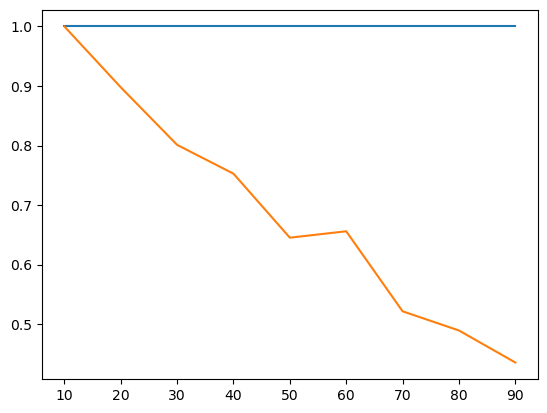

In [88]:
#Plotting 
plt.figure()
plt.plot([i for i in range (10, 100, 10)], y_train_acc)
plt.plot([i for i in range (10, 100, 10)], y_test_acc)
plt.show()


We see that the accuracy of the predictions go down the more bins there are. This makes sense as if there is 1 bin the model will always be right no matter what, if there is  2 bins the model will be right 50 % of the time just by pure chance and so on. So the more bins there are the more chance for error there is. 

Also the more bins, the closer we get to a regression type problem. In regression accuracy wouldn't be a suitable performance metrics, and that is why we use something like MSE or MAE, that calculates how far off the predictions were instead of how many correct predictions we have. 

Conlusion is that binning does not seem to be a good solution to this problem, as the performance seems to not be as good as the regression model. Also it's potentially not suitable for Kaggle submission as I assume the target values we're compared against on Kaggle aren't binned. 

#### Other models used for Kaggle submission

No other models were used for the Kaggle submission

### Final Evaluation

The model from *data pipeline with regression model* got above BEAT ME on Kaggle and performed much better than the one from *data pipeline with classification model*, which did not manage to get above BEAT ME on Kaggle

### Kaggle submission

See *data pipeline with regression model* section for the Kaggle submission 